In [1]:
# %% libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from io import StringIO 
from IPython.display import Image 
from pydot import graph_from_dot_data


In [3]:
data = pd.read_csv('C:\\Users\\DKici\\Documents\\PricingPromo\\data\\Promo_Pricing_Combined_Data\\pricing_promo_2019_2021_campaign_covid_sales.csv')
data = data.drop(columns = "Unnamed: 0")
data.head(2)

,Date,Amount of Employee pricing % off,off Particular Item?,Amount of % Off Particular Item,Location Specific?,off 1st item?,Amount of % off 1st item,off conditional?,Amount of $ off conditional,Amount of % off conditional,...,Saskatchewan_C1_School closing_3.0,Saskatchewan_C2_Workplace closing_1.0,Saskatchewan_C2_Workplace closing_2.0,Saskatchewan_C2_Workplace closing_3.0,Saskatchewan_C6_Stay at home requirements_1.0,WrittenSales,Margin,Traffic,FinancedAmount,StoreOpen
0,2019-03-01,0,0,0,0,0,0,1,0,25,...,0.0,0.0,0.0,0.0,0.0,267388.65,114438.41,1826.5,3804921.27,28.0
1,2019-03-02,0,0,0,0,0,0,1,0,25,...,0.0,0.0,0.0,0.0,0.0,668799.75,302135.49,3567.5,5347859.81,27.0


In [4]:
for i in range(len(data.columns)):
    print(i,data.columns[i])

0 Date
1 Amount of Employee pricing % off
2 off Particular Item?
3 Amount of % Off Particular Item
4 Location Specific?
5 off 1st item?
6 Amount of % off 1st item
7 off conditional?
8 Amount of $ off conditional
9 Amount of % off conditional
10 off HomeStore Specials?
11 Amount of % Off Homestore Specials 
12 Amount of % off Reg Price Living, Dining, amd M. Bedroom 
13 % off reg. price living, dining, and m. bedroom?
14 off rest of purchase?
15 Amount of % off rest of purchase 
16 off sectionals?
17 Amount % off sectionals 
18 amount of % off sofa w/ full price loveseat 
19 sofa w full-price loveseat?
20 Amount of % Accessories
21 Add. % off CLA?
22 Amount of % Off CLA 
23 off JUV?
24 Amount of % Off JUV 
25 off OTB (occasional tables)?
26 Amount of % Off OTB(occasional tables)
27  Financing?
28 Amount of % When Financing 
29 Amount of % With Rest Test 
30 Amount % Off at 090
31 Amount % off in AB
32 Amount % off in GTA
33 Amount % off in MB
34 Amount % Savings over $2499
35 Amount of 

In [5]:
# data = data.drop(columns = data.columns[80:-4], axis = 1)
# data.head()

In [6]:
data.isna().sum().sum()

0

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037 entries, 0 to 1036
Columns: 106 entries, Date to StoreOpen
dtypes: float64(26), int64(79), object(1)
memory usage: 858.9+ KB


In [8]:
feature = "Traffic"
# print(data[feature])

In [9]:
data.Traffic.max(),data.Traffic.min()

(13486.0, 0.0)

In [10]:
data[feature] = pd.to_numeric(data[feature], errors='coerce') 
# print(data.info())
data[feature] 

0       1826.5
1       3567.5
2       3276.5
3       1622.0
4       1332.0
         ...  
1032    4958.5
1033    4730.5
1034    3958.5
1035    4159.0
1036    2124.5
Name: Traffic, Length: 1037, dtype: float64

In [11]:
bins = [-500000,250000,350000,500000,650000,900000, 3600000]
names = [1,2,3,4,5,6]

In [12]:
data["Range"] = pd.cut(data[feature], bins, labels=names)

data["Range"] = pd.Categorical(data["Range"]) 
print(data["Range"].unique())

[1]
Categories (1, int64): [1]


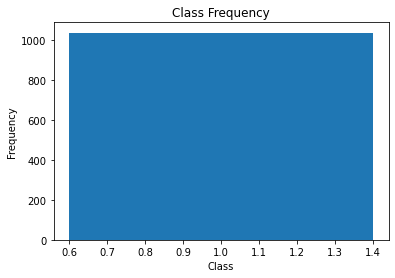

In [13]:
unique, counts = np.unique(data["Range"], return_counts=True)
plt.bar(unique, counts)

plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')

plt.show()

In [14]:
data[feature].max(), data[feature].max()+1000

(13486.0, 14486.0)

In [15]:
data.isna().sum().sum()

0

In [16]:
# data = data.dropna()
# data.isna().sum().sum()

In [17]:
data[["WrittenSales", "Range"]]

,WrittenSales,Range
0,267388.65,1
1,668799.75,1
2,671177.75,1
3,265077.82,1
4,161678.91,1
...,...,...
1032,1976177.99,1
1033,1211572.83,1
1034,1057772.56,1
1035,1353736.67,1


In [18]:
print(data["Range"].unique())

[1]
Categories (1, int64): [1]


# Train - Test Split

In [19]:
y = data.Range.astype(int).values

X = data.drop(["Date","Traffic","Margin", "WrittenSales","FinancedAmount","Range"],axis=1).values

X_df = data.drop(["Date","Traffic","Margin", "WrittenSales","FinancedAmount","Range"],axis=1)

In [20]:
y.shape,X.shape

((1037,), (1037, 101))

In [21]:
# # %% train test split
from sklearn.model_selection import train_test_split
from collections import Counter

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=100)

print(f"Training target statistics: {Counter(y_train)}")
print(f"Testing target statistics: {Counter(y_test)}")

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)


Training target statistics: Counter({1: 725})
Testing target statistics: Counter({1: 312})
Number transactions X_train dataset:  (725, 101)
Number transactions y_train dataset:  (725,)
Number transactions X_test dataset:  (312, 101)
Number transactions y_test dataset:  (312,)


## Feature Scaling

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Oversampling

In [23]:
# from imblearn.over_sampling import SMOTE

# print("Before OverSampling, counts of labels': {}".format(Counter(y_train)))

# oversample = SMOTE()
# X_train_res, y_train_res = oversample.fit_resample(X_train, y_train.ravel())

In [24]:
# print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
# print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

# print("After OverSampling, counts of label '1': {}".format(Counter(y_train_res)))

In [25]:
data[feature].max(),data["Range"].max()

(13486.0, 1)

## Applying PCA

In [26]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components = 2)
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)

# Grid Search - Imbalance

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [28]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train) 

prediction = dt.predict(X_test)
print(" {} nn score: {} ".format(3,dt.score(X_test,y_test)))

 3 nn score: 1.0 


In [29]:
dt.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [30]:
param_dict = {
    "criterion":['gini','entropy'],
    "max_depth":range(1,10),
    "min_samples_split":range(1,10),
    "min_samples_leaf":range(1,5), 
    "max_features": range(1,len(X_df.columns)) # n_features_selected
}

In [31]:
clf = GridSearchCV(dt, 
                   param_grid = param_dict,
                   cv=5, verbose=5, n_jobs=3)
clf.fit(X_train, y_train.ravel())


Fitting 5 folds for each of 64800 candidates, totalling 324000 fits


C:\Users\DKici\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [nan  1.  1. ...  1.  1.  1.]
  warnings.warn(


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=3,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'max_features': range(1, 101),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)},
             verbose=5)

In [32]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 1,
 'max_features': 1,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [33]:
clf.best_estimator_

DecisionTreeClassifier(max_depth=1, max_features=1)

In [34]:
dt1 = DecisionTreeClassifier(**clf.best_params_)

dt1.fit(X_train, y_train.ravel())

DecisionTreeClassifier(max_depth=1, max_features=1)

In [35]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [36]:
# X_train = X_train_res.T
# X_test = X_test.T
# y_train = y_train_res.T
# y_test = y_test.T

print("X_train: ",X_train.shape)
print("X_test: ",X_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

X_train:  (725, 101)
X_test:  (312, 101)
y_train:  (725,)
y_test:  (312,)


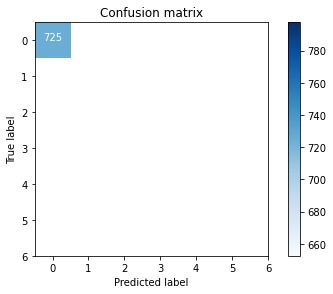

In [37]:
y_train_pre = dt1.predict(X_train)

cnf_matrix_tra = confusion_matrix(y_train, y_train_pre)
class_names = [0,1,2,3,4,5,6]
plt.figure()
plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix')
plt.show()

In [38]:
print(classification_report(y_train, dt1.predict(X_train)))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       725

    accuracy                           1.00       725
   macro avg       1.00      1.00      1.00       725
weighted avg       1.00      1.00      1.00       725



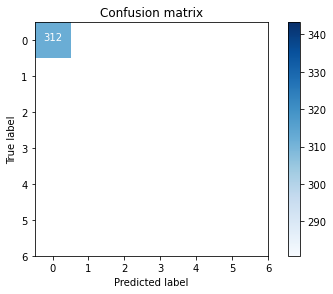

In [39]:
y_pre = dt1.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pre)
# Plot non-normalized confusion matrix
class_names = [0,1,2,3,4,5,6]
plt.figure()
plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion matrix')
plt.show()

In [40]:
print(classification_report(y_test, dt1.predict(X_test)))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       312

    accuracy                           1.00       312
   macro avg       1.00      1.00      1.00       312
weighted avg       1.00      1.00      1.00       312



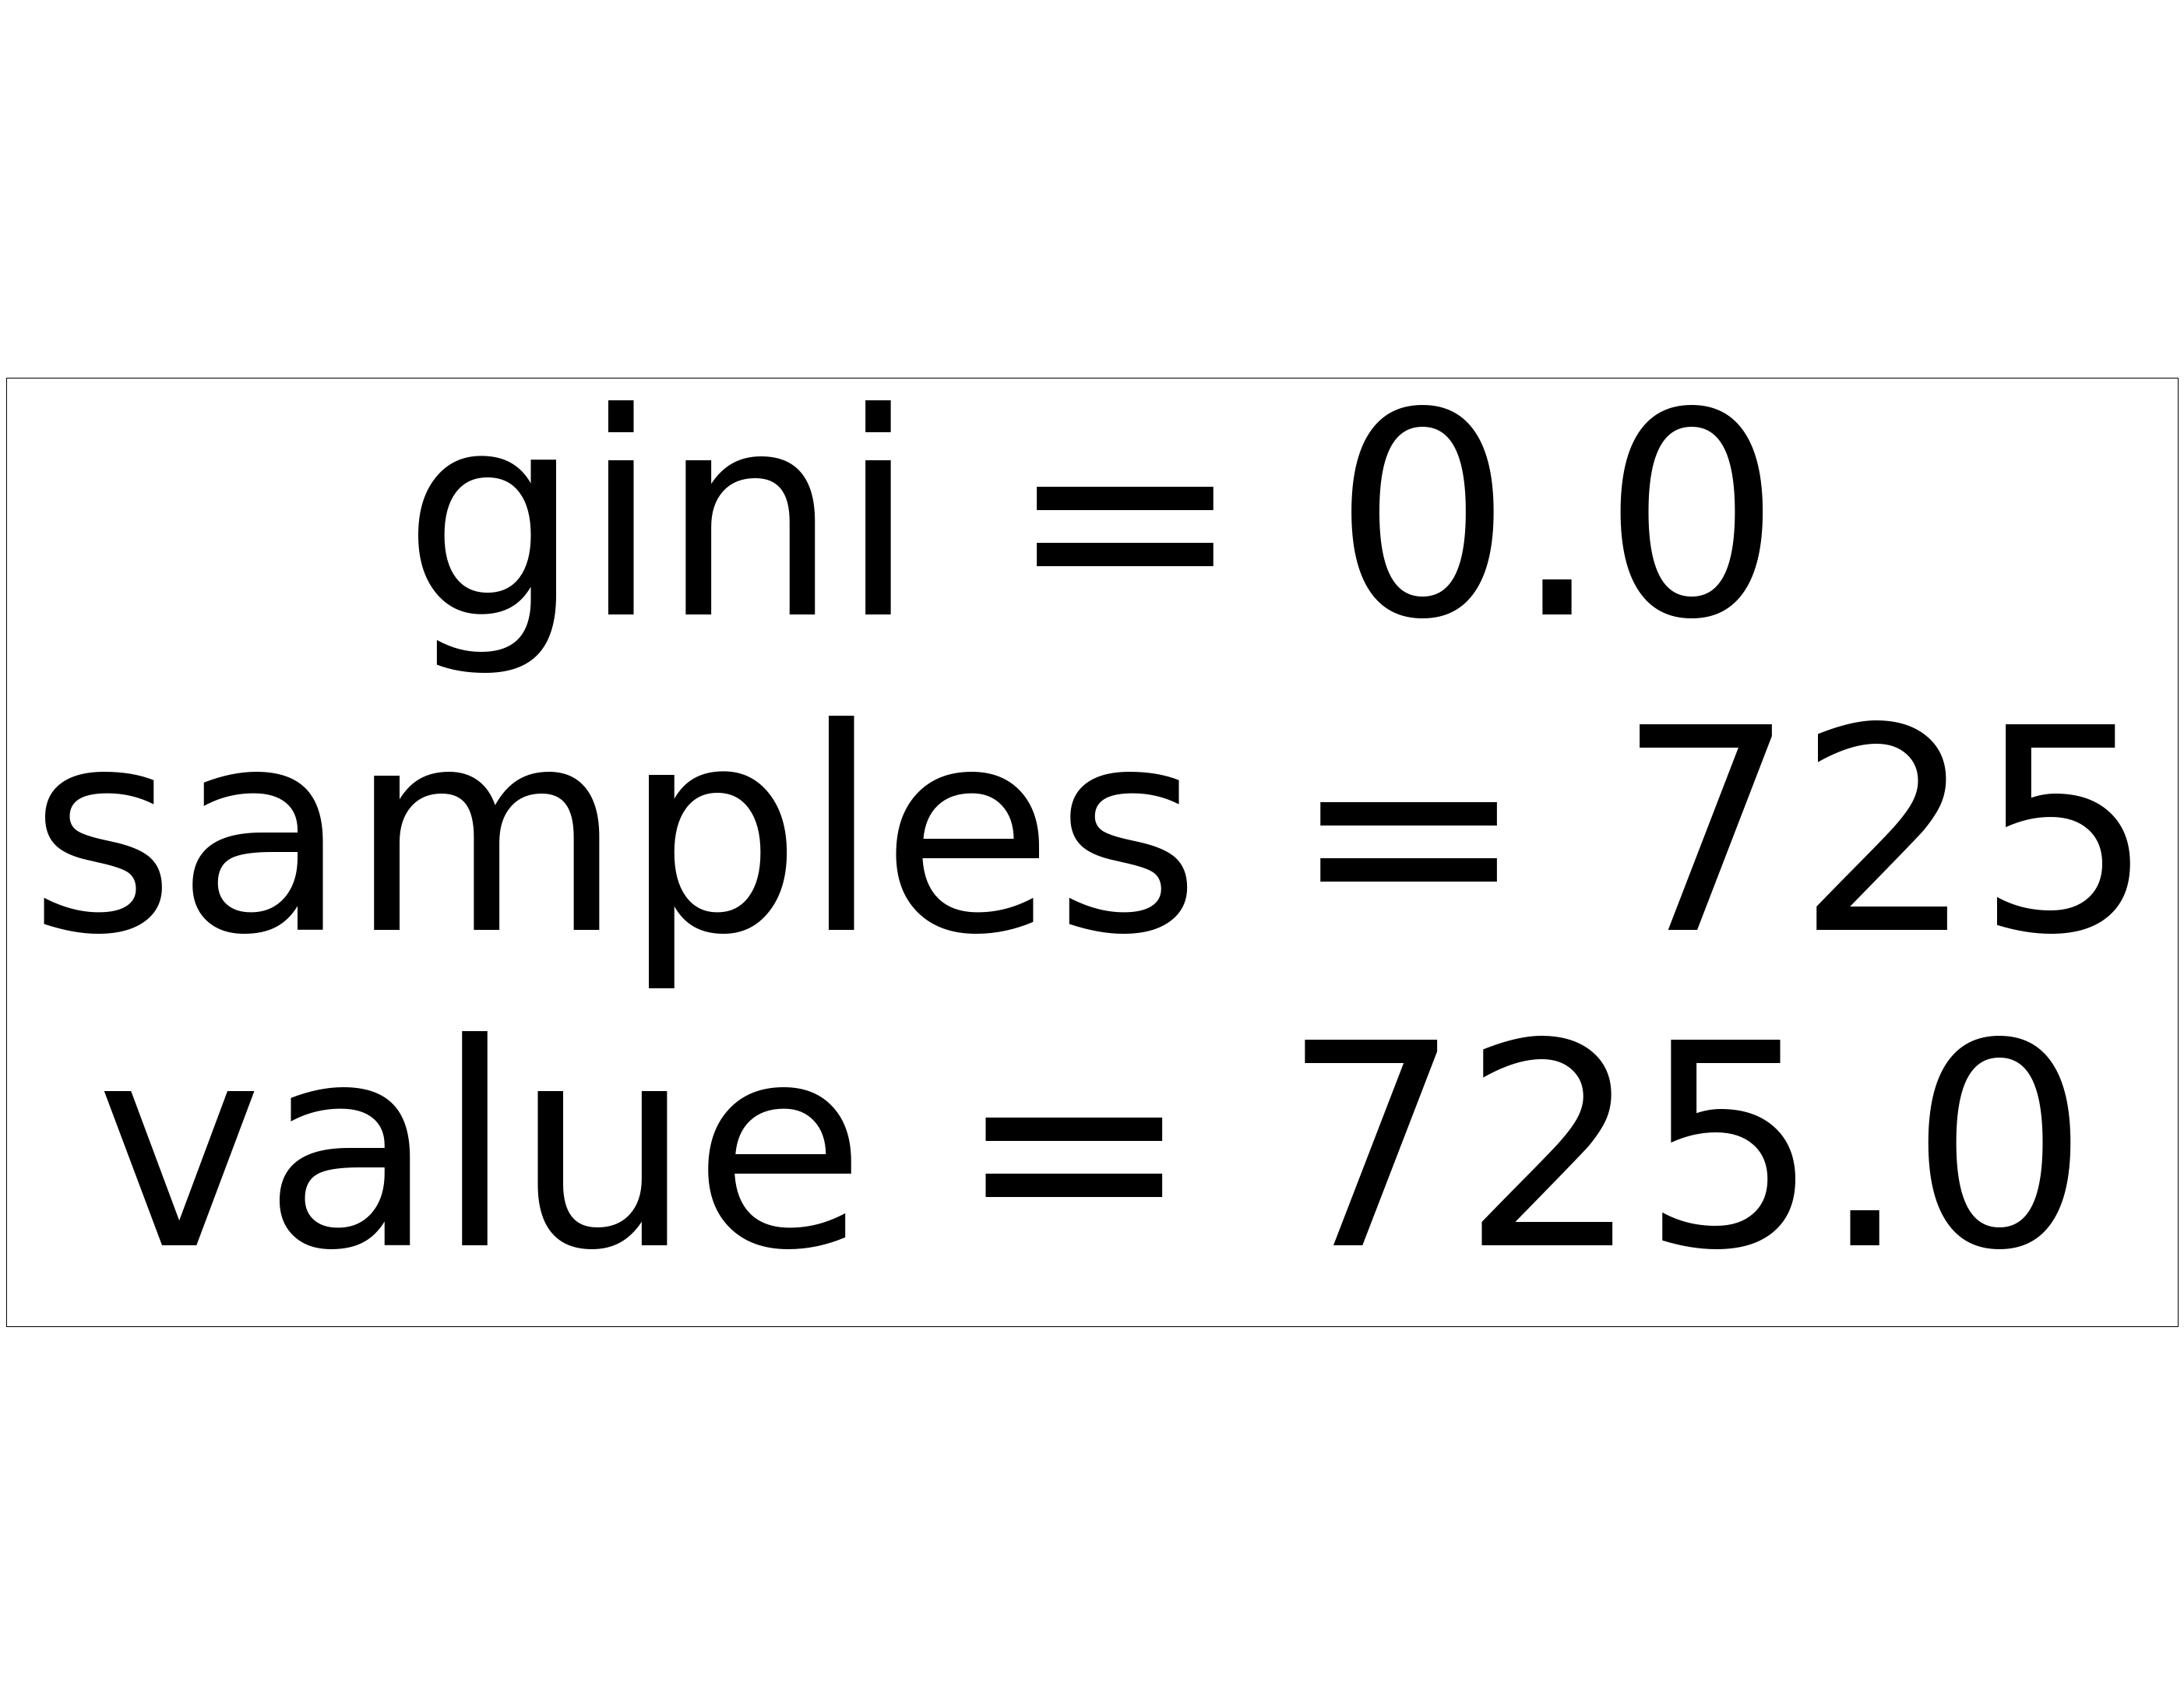

In [41]:
# Set default font size
from sklearn import tree

plt.rcParams['font.size'] = 50
fig = plt.figure(figsize=(50,40))
_ = tree.plot_tree(dt1, 
                   feature_names=data.columns[1:-5],
                   class_names=["0","1","2","3","4","5","6"],
                   filled=True)

In [42]:
# fig.savefig("decision_tree.png")

In [43]:
importances = pd.DataFrame({'feature':data.columns[1:-5],'importance':np.round(dt1.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
importances

,feature,importance
0,Amount of Employee pricing % off,0.0
64,Amount of x GST Savings,0.0
74,X% on orders over $Y,0.0
73,$X off with $Y,0.0
72,Wrap,0.0
...,...,...
31,Amount % off in GTA,0.0
30,Amount % off in AB,0.0
29,Amount % Off at 090,0.0
28,Amount of % With Rest Test,0.0


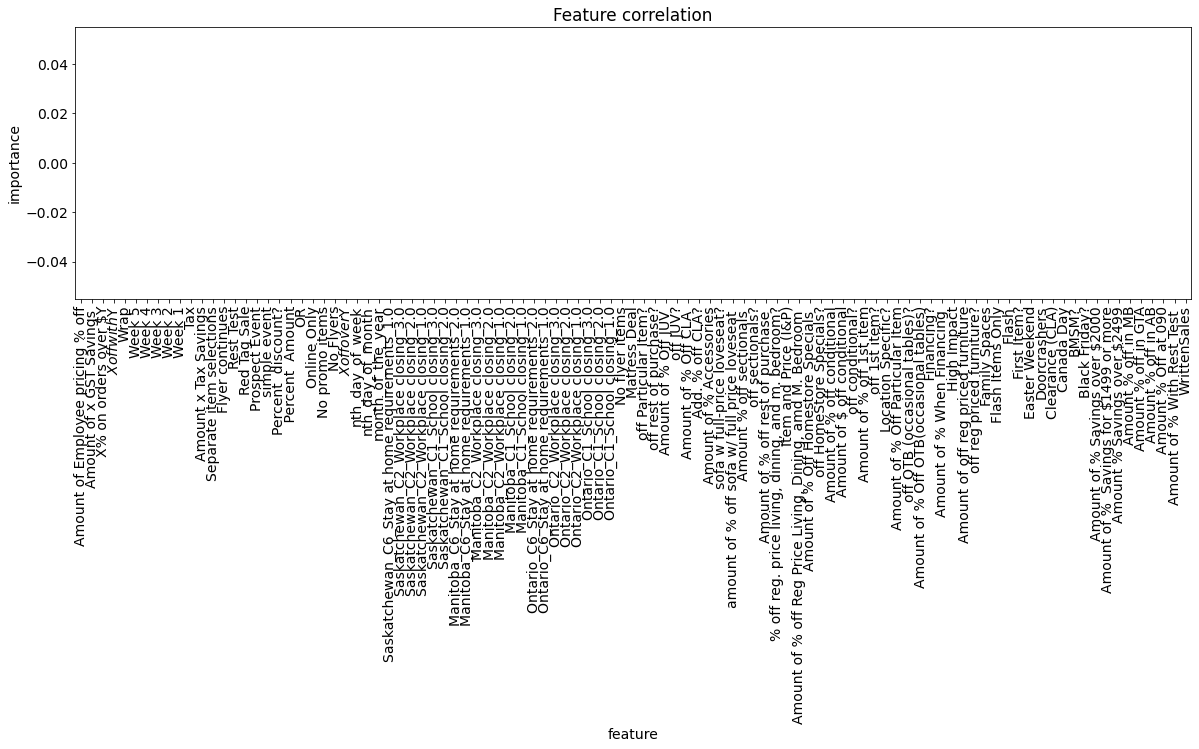

In [44]:
# Set default font size
plt.rcParams['font.size'] = 14

plt.figure(figsize = (20,5))
sns.set_palette('mako')
plt.xticks(rotation = 90)
plt.title('Feature correlation')
sns.barplot (data = importances, x = "feature", y = 'importance');